In [412]:
import pandas as pd
import numpy as np
import datetime 

import seaborn as sns
import matplotlib.pyplot as plt 
import math

In [413]:
Travel = pd.read_csv("C:\\Users\\User PC\\Desktop\\Empirical Data Analystics\\Travel.csv")
Travel.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [414]:
print('Total no of rows:', Travel.shape[0])
print('Total no of coloums::', Travel.shape[1])

Total no of rows: 4888
Total no of coloums:: 20


In [415]:
Travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [416]:
Travel = Travel.astype(
    {'CustomerID':'category',
     'ProdTaken':'bool',
     'TypeofContact':'category',
     'CityTier':'category',
     'Occupation':'category',
     'Gender':'category',
     'ProductPitched':'category',
     'MaritalStatus':'category',
     'Passport':'bool',
     'OwnCar':'bool',
     'Designation':'category'})
Travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   category
 1   ProdTaken                 4888 non-null   bool    
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   category
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

In [417]:
Travel.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [418]:
# remove duplicate and null in ID
Travel['CustomerID'].drop_duplicates()
Travel.dropna(subset=['CustomerID'])

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,True,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,True,2,True,0.0,Manager,20993.0
1,200001,False,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,False,3,True,2.0,Manager,20130.0
2,200002,True,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,True,3,False,0.0,Executive,17090.0
3,200003,False,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,True,5,True,1.0,Executive,17909.0
4,200004,False,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,False,5,True,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,True,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,True,1,True,1.0,Manager,26576.0
4884,204884,True,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,True,3,True,2.0,Executive,21212.0
4885,204885,True,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,False,1,True,3.0,Senior Manager,31820.0
4886,204886,True,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,False,5,False,2.0,Executive,20289.0


In [419]:
# drop null value in Age
Travel['Age'].dropna().astype('int64')

0       41
1       49
2       37
3       33
5       32
        ..
4883    49
4884    28
4885    52
4886    19
4887    36
Name: Age, Length: 4662, dtype: int64

In [420]:
Travel.dropna(subset=['Age'], inplace = True)
Travel.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,True,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,True,2,True,0.0,Manager,20993.0
1,200001,False,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,False,3,True,2.0,Manager,20130.0
2,200002,True,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,True,3,False,0.0,Executive,17090.0
3,200003,False,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,True,5,True,1.0,Executive,17909.0
5,200005,False,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,False,5,True,1.0,Executive,18068.0


In [421]:
Total_Null = Travel['Age'].isna().sum()
print('Total no of null values in Age:', Total_Null)

Total no of null values in Age: 0


# EDA and Data Visualisation

In [422]:
Travel['Age'].describe().round(2)

count    4662.00
mean       37.62
std         9.32
min        18.00
25%        31.00
50%        36.00
75%        44.00
max        61.00
Name: Age, dtype: float64

In [423]:
age = Travel[['CustomerID','Age']]
age_distribuation = age.groupby(['Age']).count()

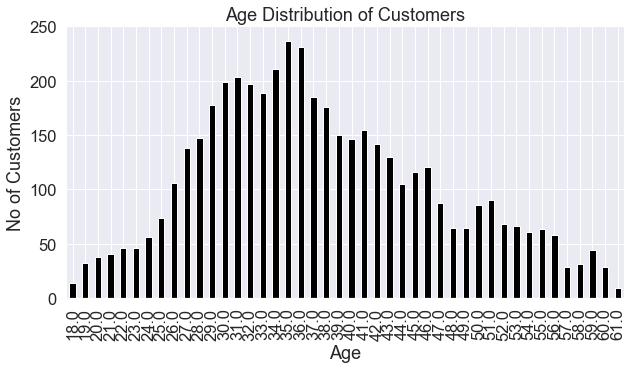

In [424]:
age_distribuation.plot.bar(color = 'black', figsize = (10,5), legend = None, ylim = (0,250))
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('No of Customers')
plt.show('equal')

In [425]:
Travel['Age'].skew().round(5)

0.38299

In [426]:
Travel['Age'].kurtosis().round(5)

-0.45133

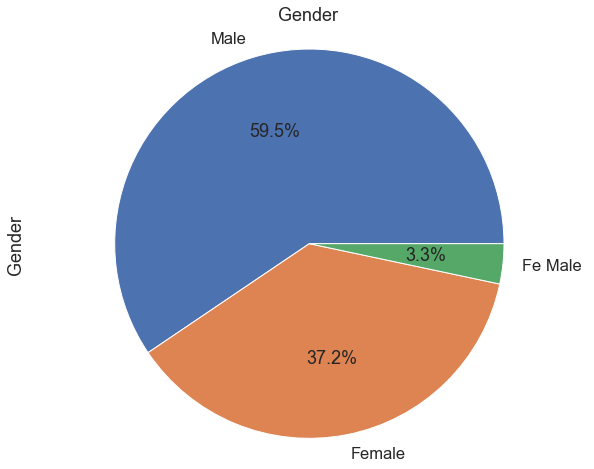

In [427]:
Travel.Gender.value_counts().plot.pie(autopct = '%1.1f%%', title = 'Gender')
plt.axis('equal')
plt.show()

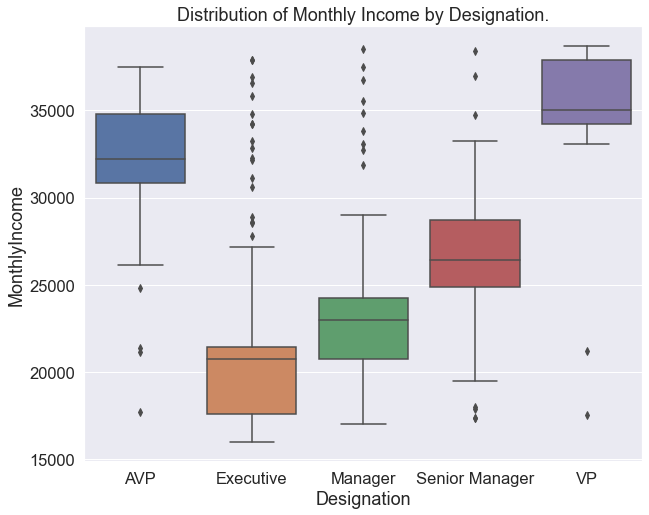

In [440]:
sns.boxplot(x = 'Designation', y = 'MonthlyIncome', data = Travel).set_title('Distribution of Monthly Income by Designation.')
plt.show()

In [429]:
#find outlier in exercutive 
Travel.loc[Travel["MonthlyIncome"] > 80000]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,200038,False,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,True,2,True,0.0,Executive,95000.0
2482,202482,False,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,True,2,True,1.0,Executive,98678.0


In [430]:
#remove outlier
Travel1 = Travel.drop([38,2482])

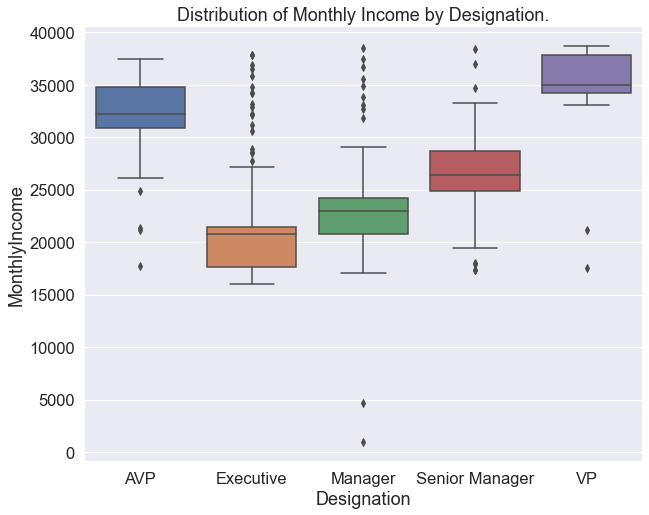

In [431]:
sns.boxplot(x = 'Designation', y = 'MonthlyIncome', data = Travel1).set_title('Distribution of Monthly Income by Designation.')
plt.show()

In [432]:
Travel1.loc[Travel["MonthlyIncome"] < 10000]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
142,200142,False,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,3.0,Single,4.0,True,5,False,0.0,Manager,1000.0
2586,202586,False,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Deluxe,3.0,Single,5.0,True,5,False,1.0,Manager,4678.0


In [433]:
Outlier2 = Travel1.drop([142,2586])

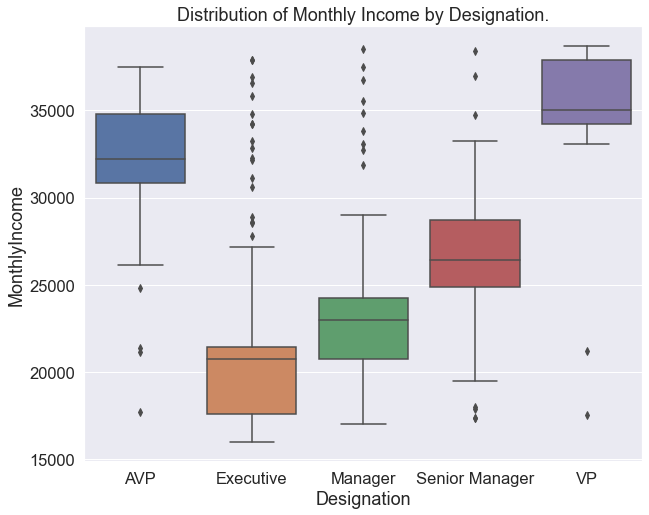

In [434]:
sns.boxplot(x = 'Designation', y = 'MonthlyIncome', data = Outlier2).set_title('Distribution of Monthly Income by Designation.')
plt.show()

In [435]:
Travel = Outlier2

In [436]:
Travel3 = pd.crosstab(Travel.loc[:,'Designation'],
                     Travel.loc[:,'ProdTaken'])
Travel3

ProdTaken,False,True
Designation,,
AVP,322,20
Executive,1181,515
Manager,1451,198
Senior Manager,618,123
VP,210,20


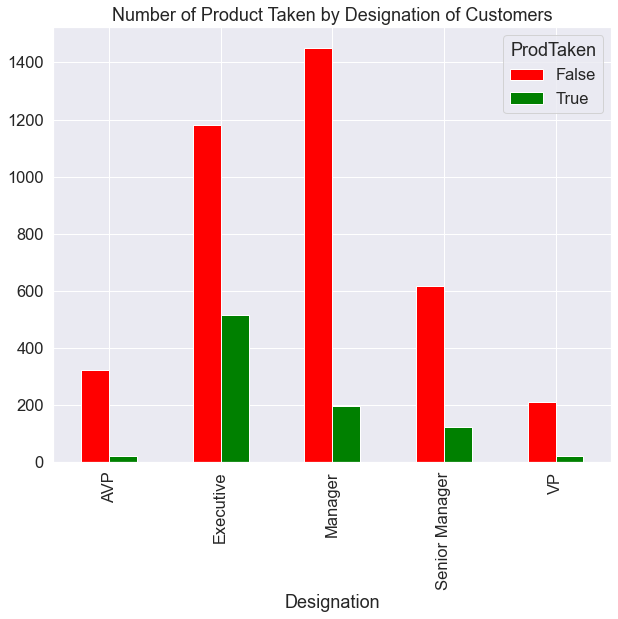

In [437]:
Travel3.plot.bar(title = 'Number of Product Taken by Designation of Customers', color = ['red','green'])
plt.show()

In [438]:
Travel2 = pd.crosstab(Travel.loc[:,'Gender'],
                     Travel.loc[:,'ProdTaken'])
Travel2

ProdTaken,False,True
Gender,,
Fe Male,130,25
Female,1426,305
Male,2226,546


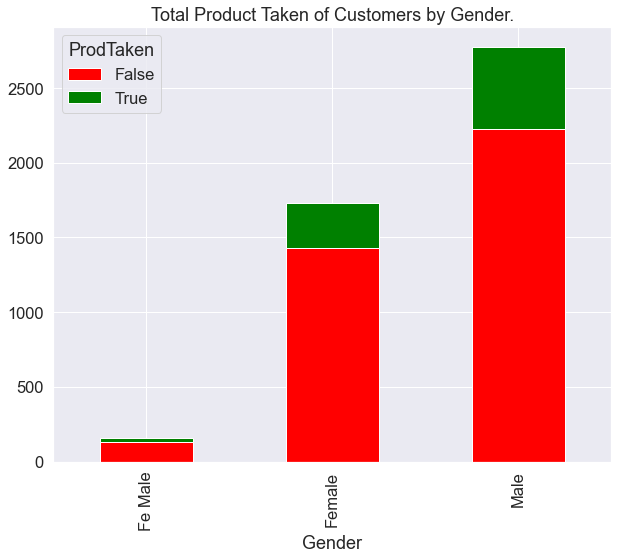

In [442]:
Travel2.plot.bar(title = 'Total Product Taken of Customers by Gender.', stacked = True, color = ['red','green'])
plt.show()